In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def show_image(image, name='Lenna'):
    plt.imshow(image)
    plt.title(name)
    plt.savefig(name)
    plt.show()

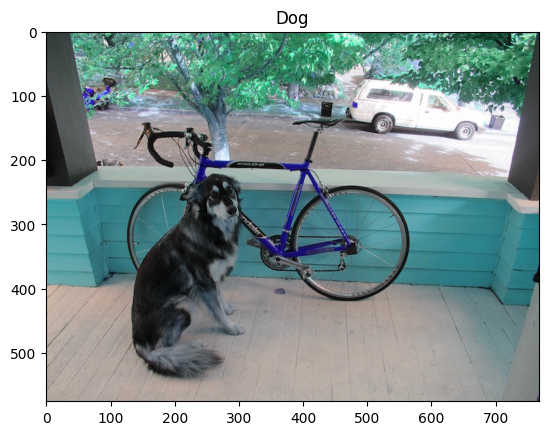

(576, 768, 3)


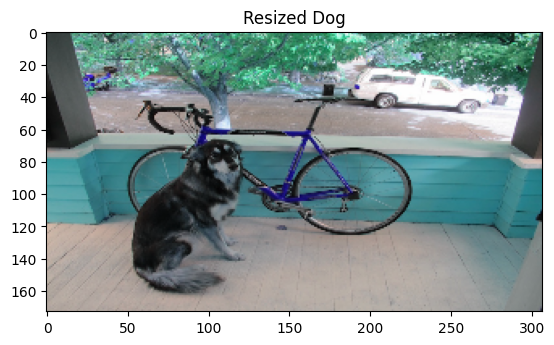

(173, 307, 3)


In [49]:
image = cv2.imread('../images/dog.jpg')
resized_image = cv2.resize(image, None, fx=0.4, fy=0.3)

show_image(image, 'Dog')
print(image.shape)
show_image(resized_image, 'Resized Dog')
print(resized_image.shape)

In [50]:
net = cv2.dnn.readNet('yolov5s.onnx')
classes  = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [51]:
for i in net.getUnconnectedOutLayers():
    print(i)

255


In [52]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [53]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [54]:
height, width, channels = resized_image.shape
blob = cv2.dnn.blobFromImage(resized_image, 1 / 255.0, (640, 640), (0, 0, 0), True, crop=False)

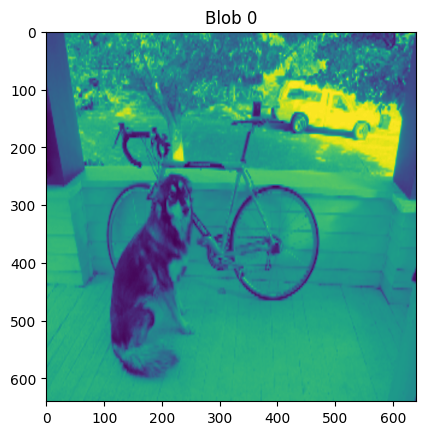

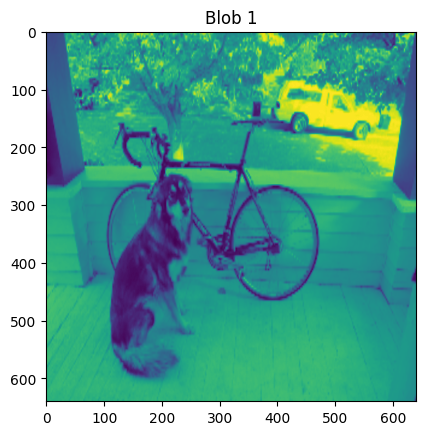

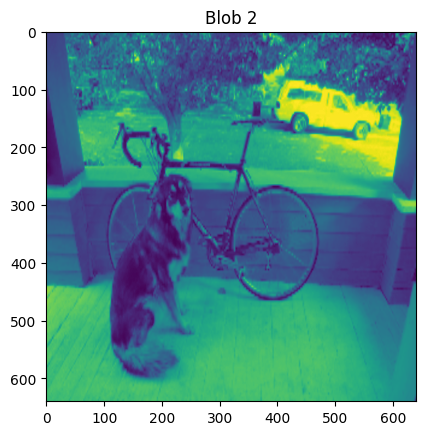

In [55]:
for b in blob:
    for i, image_blob in enumerate(b):
        show_image(image_blob, f'Blob {i}')

In [56]:
net.setInput(blob)
outs = net.forward(outputlayers)[0][0]
print(outs)

[[2.8515110e+00 3.5399051e+00 7.4364810e+00 ... 1.8127381e-03
  7.4857066e-04 1.5864477e-03]
 [1.3368936e+01 4.1004477e+00 2.7174122e+01 ... 1.9414307e-03
  9.0126210e-04 1.6011968e-03]
 [2.0403786e+01 4.2431841e+00 2.7958090e+01 ... 1.5395207e-03
  8.2981959e-04 1.4289545e-03]
 ...
 [5.6416632e+02 6.2761383e+02 1.6588567e+02 ... 2.0648597e-03
  1.0486696e-03 1.2050885e-03]
 [5.9441315e+02 6.2379395e+02 1.3215428e+02 ... 2.1338654e-03
  1.2839516e-03 1.4800309e-03]
 [6.2584454e+02 6.2372681e+02 1.2311974e+02 ... 2.3749482e-03
  1.2922315e-03 1.8738296e-03]]


In [57]:
class_ids=[]
confidences=[]
boxes=[]

x_factor = width / 640
y_factor = height / 640

for detection in outs:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if detection[4] > 0.198 and confidence > 0.8:
        # object detected
        center_x= int(detection[0] * x_factor)
        center_y= int(detection[1] * y_factor)
        w = int(detection[2] * x_factor)
        h = int(detection[3] * y_factor)
        # rectangle co-ordinaters
        x=int(center_x - w / 2)
        y=int(center_y - h / 2)
        
        boxes.append([x, y, w, h])  # put all rectangle areas
        confidences.append(float(confidence)) 
        # how confidence was that object detected and show that percentage
        class_ids.append(class_id)  # name of the object tha was detected

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.4, 0.6)

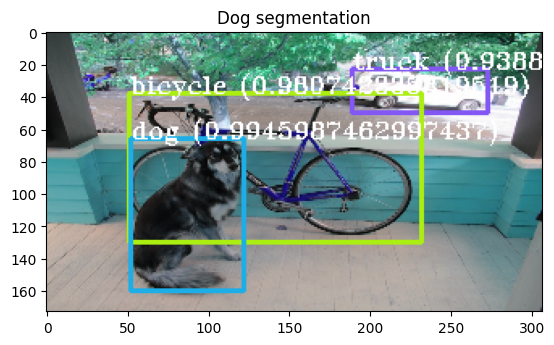

In [58]:
rectangled_image = resized_image.copy()
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        color = colors[class_ids[i] % len(colors)]
        cv2.rectangle(rectangled_image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(
            rectangled_image,
            label + ' (' + str(confidences[i]) + ')',
            (x, y),
            fontFace=cv2.FONT_HERSHEY_TRIPLEX,
            fontScale=0.5,
            color=(255, 255, 255)
        )

show_image(rectangled_image, 'Dog segmentation')